# Projeto do Curso de Python para Análise de Dados
## Projeto 02 - Case Educação

In [200]:
# Importando as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
# Estilo do seaborn
sns.set_style('ticks')

In [202]:
# Fazendo o upload do .csv
dados = pd.read_csv('StudentsPerformance+(1).csv')
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Explorando algumas informações gerais 

In [203]:
# Tamanho do Dataset
dados.shape

(1000, 8)

In [204]:
# Nome das Colunas
dados.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

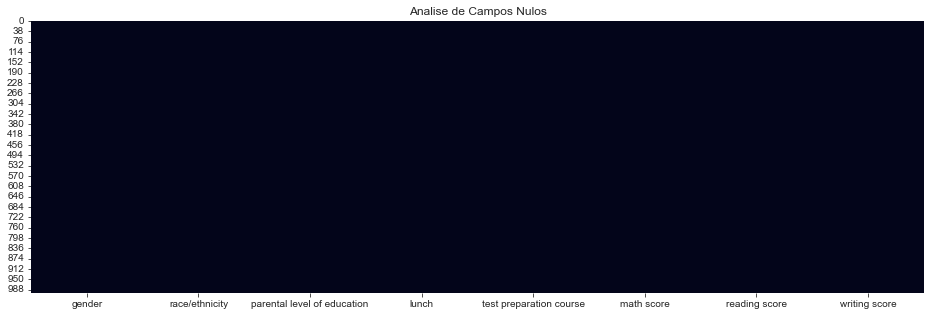

In [205]:
# Verificando os campos nulos

Nulos = dados.isnull()

plt.figure( figsize=(16,5) )
plt.title('Analise de Campos Nulos')
sns.heatmap(Nulos , cbar=False);

In [206]:
# Verificando se há alguma linha duplicada
dados.duplicated().sum()

0

In [207]:
# Aqui são alguns dados gerais do conjunto de dados, temos média, mediana, minimo, máximo e etc.
dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Análise de Alunos por Gênero

### Distribuição de alunos de cada gênero

In [208]:
dados['gender'].value_counts(normalize=True)*100

female    51.8
male      48.2
Name: gender, dtype: float64

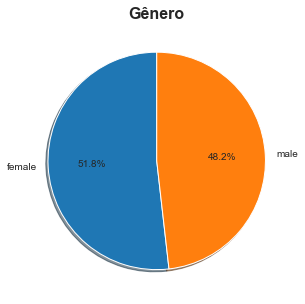

In [209]:
dist_genero = dados['gender'].value_counts(normalize=True)*100

plt.figure( figsize=(16,5) )
plt.title('Gênero', weight="bold", size=16)
plt.pie(
    dist_genero,
    labels= dados['gender'].unique(),
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.show()

### Resultados nas provas por gênero

[]

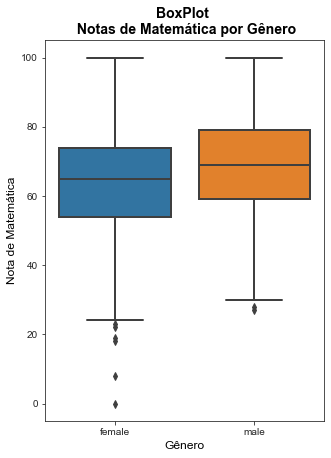

In [210]:
plt.figure( figsize=(5,7) )
ax = sns.boxplot(data = dados, x = 'gender', y ='math score', linewidth=2 )

plt.title('BoxPlot \n Notas de Matemática por Gênero',dict(color ='black'), weight="bold", size=14)
plt.ylabel('Nota de Matemática',dict(color ='black'), size=12)
plt.xlabel('Gênero',dict(color ='black'), size=12)

ax.plot()

[]

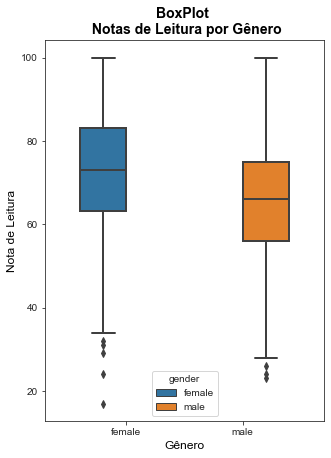

In [211]:
plt.figure( figsize=(5,7) )
ax = sns.boxplot(data = dados, x = 'gender', y ='reading score', linewidth=2, hue = "gender" )

plt.title('BoxPlot \n Notas de Leitura por Gênero',dict(color ='black'), weight="bold", size=14)
plt.ylabel('Nota de Leitura',dict(color ='black'), size=12)
plt.xlabel('Gênero',dict(color ='black'), size=12)

ax.plot()

[]

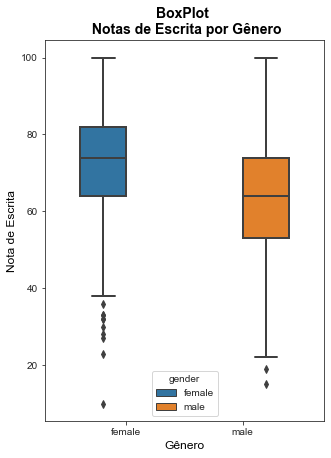

In [212]:
plt.figure( figsize=(5,7) )
ax = sns.boxplot(data = dados, x = 'gender', y ='writing score', linewidth=2, hue = "gender")

plt.title('BoxPlot \n Notas de Escrita por Gênero',dict(color ='black'), weight="bold", size=14)
#plt.legend(dados['gender'].unique())
plt.ylabel('Nota de Escrita',dict(color ='black'), size=12)
plt.xlabel('Gênero',dict(color ='black'), size=12)

ax.plot()

## Distribuição de alunos de cada grupo étnico

In [213]:
dados['race/ethnicity'].value_counts(normalize=True)*100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

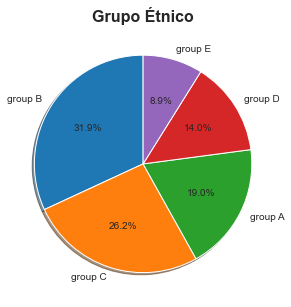

In [214]:
dist_etnico = dados['race/ethnicity'].value_counts(normalize=True)*100

plt.figure( figsize=(16,5) )
plt.title('Grupo Étnico', weight="bold", size=16)
plt.pie(
    dist_etnico,
    labels= dados['race/ethnicity'].unique(),
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.show()

## Distribuição de alunos do nível de educação dos pais

In [215]:
dados['parental level of education'].value_counts(normalize=True)*100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

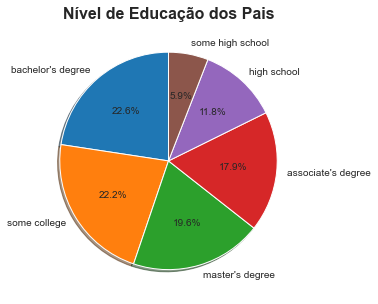

In [216]:
dist_parental_education = dados['parental level of education'].value_counts(normalize=True)*100

plt.figure( figsize=(16,5) )
plt.title('Nível de Educação dos Pais', weight="bold", size=16)
plt.pie(
    dist_parental_education,
    labels= dados['parental level of education'].unique(),
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.show()

In [217]:
dados.groupby(by= ['parental level of education']).describe()['math score'].reset_index()

,parental level of education,count,mean,std,min,25%,50%,75%,max
0,associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
1,bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
2,high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
3,master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
4,some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
5,some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


#### Aqui é possível verificar que a média das notas de estudantes tende ser maior quando os pais tem algum tipo de graduação.

## Distribuição de alunos que tem acesso ao almoço?

In [218]:
dados['lunch'].value_counts(normalize=True)*100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

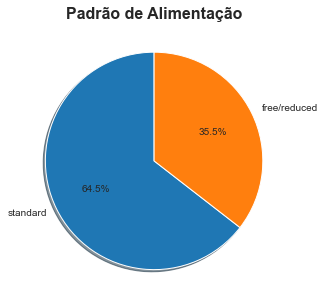

In [219]:
dist_almoco = dados['lunch'].value_counts(normalize=True)*100

plt.figure( figsize=(16,5) )
plt.title('Padrão de Alimentação', weight="bold", size=16)
plt.pie(
    dist_almoco,
    labels= dados['lunch'].unique(),
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.show()

## Distribuição de alunos que fizeram o teste de Preparação

In [220]:
dados['test preparation course'].value_counts(normalize=True)*100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

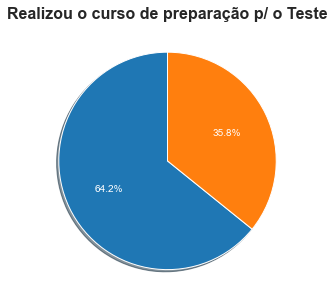

In [221]:
dist_teste_preparacao = dados['test preparation course'].value_counts(normalize=True)*100

plt.figure( figsize=(16,5) )
plt.title('Realizou o curso de preparação p/ o Teste', weight="bold", size=16)
plt.pie(
    dist_teste_preparacao,
    labels= dados['test preparation course'].unique(),
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
    )
plt.show()

In [222]:
dados.groupby(by= ['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


#### Aqui é possível verificar que média das notas de matemática de quem fez o teste de preparação é maior.

## Verificando a Simetria dos dados

In [223]:
assimetria_matematica = dados['math score'].skew()

if assimetria_matematica.round(1)<0:
    print('A forma de distribuição dos dados é ASSIMÉTRICA NEGATIVA e seu valor é: ',assimetria_matematica.round(2))
elif assimetria_matematica.round(1)>0:
    print('A forma de distribuição dos dados é ASSIMÉTRICA POSITIVA e seu valor é: ',assimetria_matematica.round(2))
else:
    print('A forma de distribuição dos dados é SIMÉTRICA e seu valor é: ',assimetria_matematica.round(2))

A forma de distribuição dos dados é ASSIMÉTRICA NEGATIVA e seu valor é:  -0.28


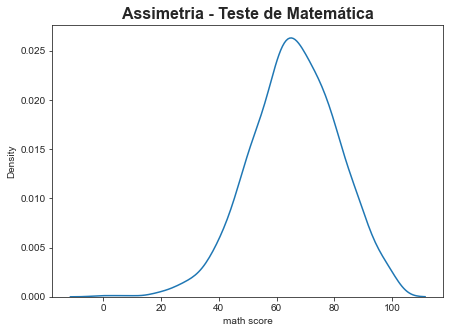

In [224]:
plt.figure( figsize=(7,5) )
plt.title('Assimetria - Teste de Matemática', weight="bold", size=16)
sns.kdeplot(dados['math score'])
plt.show()

In [225]:
assimetria_escrita = dados['writing score'].skew()

if assimetria_escrita.round(1)<0:
    print('A forma de distribuição dos dados é ASSIMÉTRICA NEGATIVA e seu valor é: ',assimetria_escrita.round(2))
elif assimetria_escrita.round(1)>0:
    print('A forma de distribuição dos dados é ASSIMÉTRICA POSITIVA e seu valor é: ',assimetria_escrita.round(2))
else:
    print('A forma de distribuição dos dados é SIMÉTRICA e seu valor é: ',assimetria_escrita.round(2))

A forma de distribuição dos dados é ASSIMÉTRICA NEGATIVA e seu valor é:  -0.29


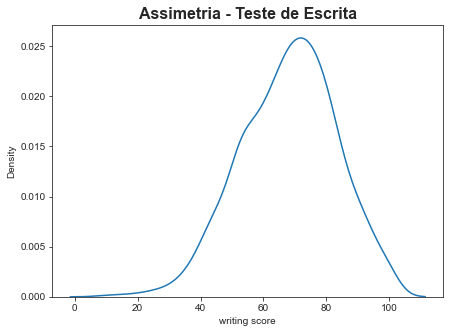

In [226]:
plt.figure( figsize=(7,5) )
plt.title('Assimetria - Teste de Escrita', weight="bold", size=16)
sns.kdeplot(dados['writing score'])
plt.show()

In [227]:
assimetria_leitura = dados['reading score'].skew()

if assimetria_leitura.round(1)<0:
    print('A forma de distribuição dos dados é ASSIMÉTRICA NEGATIVA e seu valor é: ',assimetria_leitura.round(2))
elif assimetria_leitura.round(1)>0:
    print('A forma de distribuição dos dados é ASSIMÉTRICA POSITIVA e seu valor é: ',assimetria_leitura.round(2))
else:
    print('A forma de distribuição dos dados é SIMÉTRICA e seu valor é: ',assimetria_leitura.round(2))

A forma de distribuição dos dados é ASSIMÉTRICA NEGATIVA e seu valor é:  -0.26


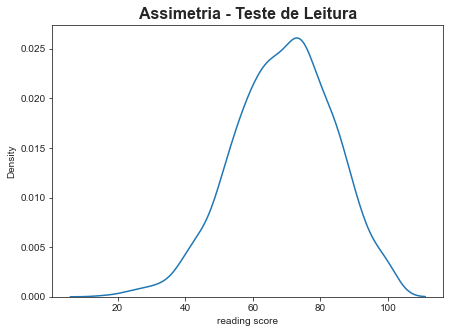

In [228]:
plt.figure( figsize=(7,5) )
plt.title('Assimetria - Teste de Leitura', weight="bold", size=16)
sns.kdeplot(dados['reading score']);

### **Medidas de Assimetria - Anotações** <p> 
A medida de assimetria é um indicador da forma da distribuição dos dados. Ao construir uma distribuição de freqüências e/ou um histograma, está-se buscando, também, identificar visualmente, a forma da distribuição dos dados

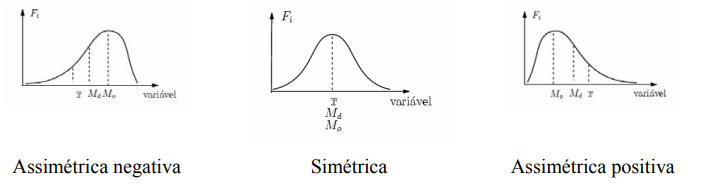

**Simétrica** se média = mediana = moda ou As = 0 <p>
**Assimétrica** negativa se média ≤ mediana ≤ moda As < 0 <p>
**Assimétrica** positiva se moda ≤ mediana ≤ média ou As > 0

## Medida de Curtose

#### **Anotações** <p>
A medida de curtose é o grau de achatamento da distribuição, é um indicador da forma desta distribuição

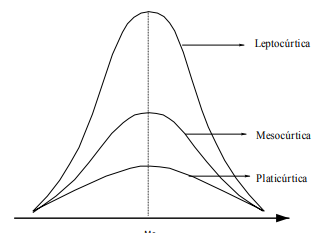

**Leptocúrtica**: quando a distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente concentrados em torno de seu centro, K < 0,263. <p>
**Mesocúrtica**: quando os dados estão razoavelmente concentrados em torno de seu centro, K= 0,263 <p>
**Platicúrtica**: quando a distribuição apresenta uma curva de freqüência mais aberta, com os dados fracamente concentrados em torno de seu centro, K > 0,263.

#### Notas de Matemática

In [229]:
k = dados['math score'].kurtosis()

if k.round(3)<0.263:
    print('Distribuição Leptocúrtica - distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente concentrados em torno de seu centro.\n O Valor de k é: ',k.round(2))
elif k.round(3)==0.263:
    print('Distribuição Mesocúrtica - os dados estão razoavelmente concentrados em torno de seu centro.\n O Valor de k é: ',k.round(2))
else:
    print('Distribuição Platicúrtica - a distribuição apresenta uma curva de freqüência mais aberta, com os dados fracamente concentrados em torno de seu centro. \n O Valor de k é: ',k.round(2))

Distribuição Platicúrtica - a distribuição apresenta uma curva de freqüência mais aberta, com os dados fracamente concentrados em torno de seu centro. 
 O Valor de k é:  0.27


#### Notas de Leitura

In [230]:
k = dados['reading score'].kurtosis()

if k.round(3)<0.263:
    print('Distribuição Leptocúrtica - distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente concentrados em torno de seu centro.\n O Valor de k é: ',k.round(2))
elif k.round(3)==0.263:
    print('Distribuição Mesocúrtica - os dados estão razoavelmente concentrados em torno de seu centro.\n O Valor de k é: ',k.round(2))
else:
    print('Distribuição Platicúrtica - a distribuição apresenta uma curva de freqüência mais aberta, com os dados fracamente concentrados em torno de seu centro. \n O Valor de k é: ',k.round(2))

Distribuição Leptocúrtica - distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente concentrados em torno de seu centro.
 O Valor de k é:  -0.07


#### Notas de Escrita

In [231]:
k = dados['reading score'].kurtosis()

if k.round(3)<0.263:
    print('Distribuição Leptocúrtica - distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente concentrados em torno de seu centro.\n O Valor de k é: ',k.round(2))
elif k.round(3)==0.263:
    print('Distribuição Mesocúrtica - os dados estão razoavelmente concentrados em torno de seu centro.\n O Valor de k é: ',k.round(2))
else:
    print('Distribuição Platicúrtica - a distribuição apresenta uma curva de freqüência mais aberta, com os dados fracamente concentrados em torno de seu centro. \n O Valor de k é: ',k.round(2))

Distribuição Leptocúrtica - distribuição apresenta uma curva de freqüência bastante fechada, com os dados fortemente concentrados em torno de seu centro.
 O Valor de k é:  -0.07


## Verificando Correlações

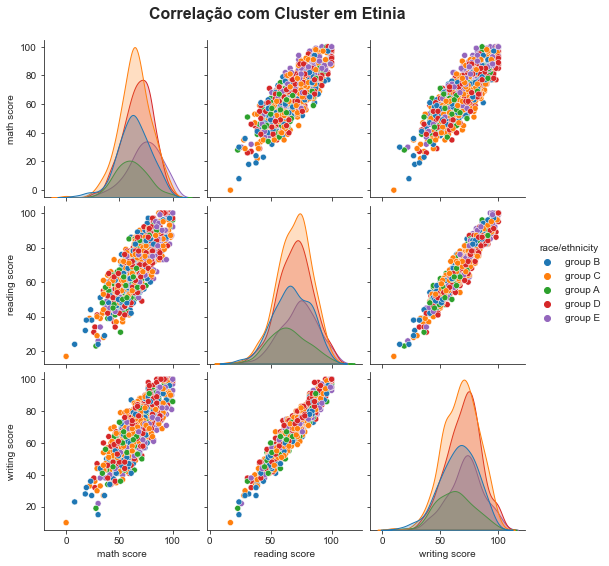

In [232]:
# Correlação utilizando a etinia como cluster
sns.pairplot( dados, hue='race/ethnicity' )
plt.title('Correlação com Cluster em Etinia', weight="bold", size=16,y=3.2,x = -0.6)
plt.show()

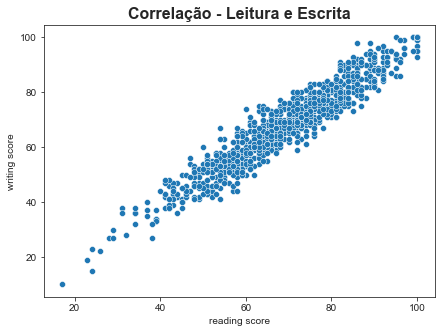

In [233]:
plt.figure( figsize=(7,5) )
plt.title('Correlação - Leitura e Escrita', weight="bold", size=16)
sns.scatterplot( data=dados, x='reading score', y='writing score');

### Mapa de Calor para analisar correlação em Pearson e Spearman

O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

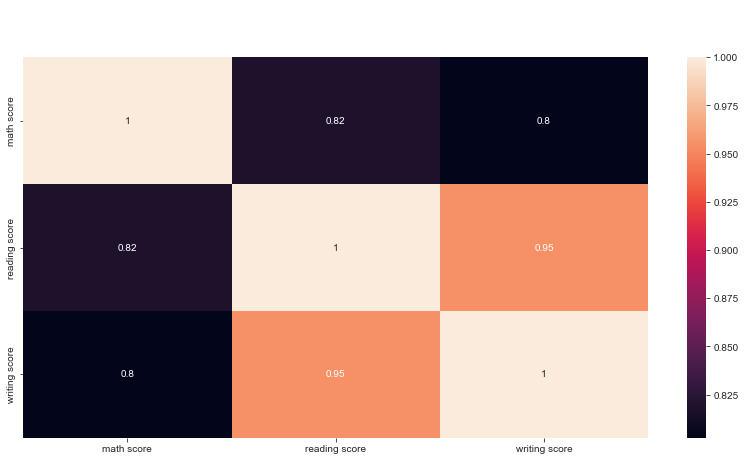

In [234]:
# Pearson
plt.figure( figsize=(14,7) )
plt.title('Teste de Correlação por Peason\n',dict(color ='w'), weight="bold", size=24)
sns.heatmap(dados.corr(),annot = True);

**Correlação de Spearman** <p>
Uma vez que a correlação de Spearman segue uma lógica monotética, e não tem pressupostos lineares como na correlação de Pearson, é possível utilizar o rs para relações não lineares

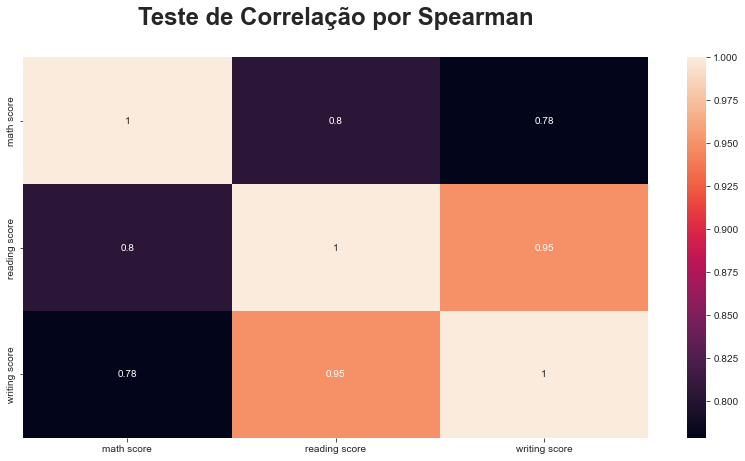

In [235]:
# Spearman
plt.figure( figsize=(14,7) )
plt.title('Teste de Correlação por Spearman\n', weight="bold", size=24)
sns.heatmap(dados.corr('spearman'),annot = True);